In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib','inline')

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

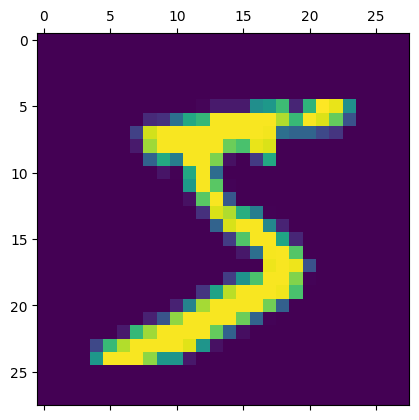

In [8]:
plt.matshow(x_train[0])

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6411 - accuracy: 0.8385 - val_loss: 0.3549 - val_accuracy: 0.9040
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3341 - accuracy: 0.9065 - val_loss: 0.2961 - val_accuracy: 0.9198
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2854 - accuracy: 0.9202 - val_loss: 0.2590 - val_accuracy: 0.9296
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2558 - accuracy: 0.9286 - val_loss: 0.2369 - val_accuracy: 0.9349
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2333 - accuracy: 0.9344 - val_loss: 0.2194 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2152 - accuracy: 0.9401 - val_loss: 0.2061 - val_accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2000 - accuracy: 0.9439 - val_loss: 0.1949 - val_ac

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1644 - accuracy: 0.9524
Loss=0.164
Accuracy=0.952


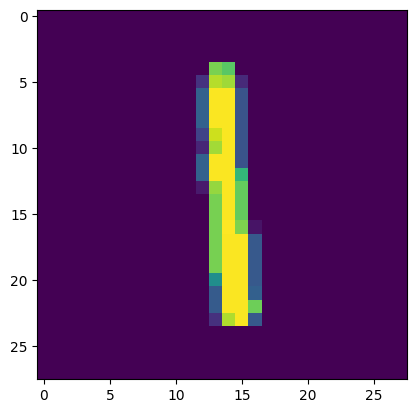

In [16]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is=%d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 2s 4ms/step
Handwritten number in the image is=1


In [18]:
get_ipython().run_line_magic('pinfo2','history.history')

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

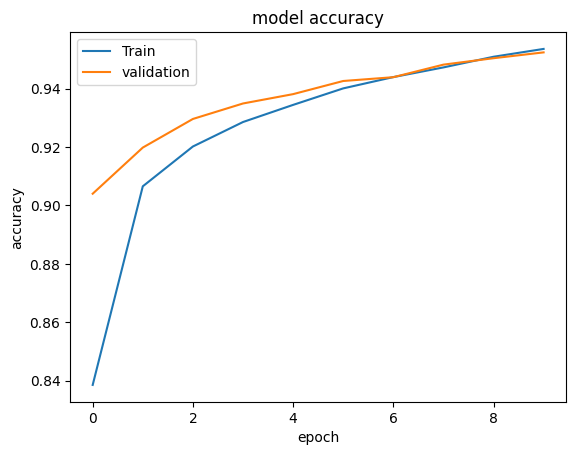

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

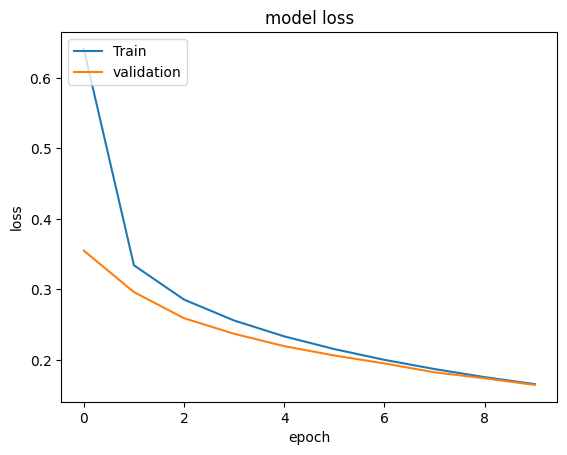

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

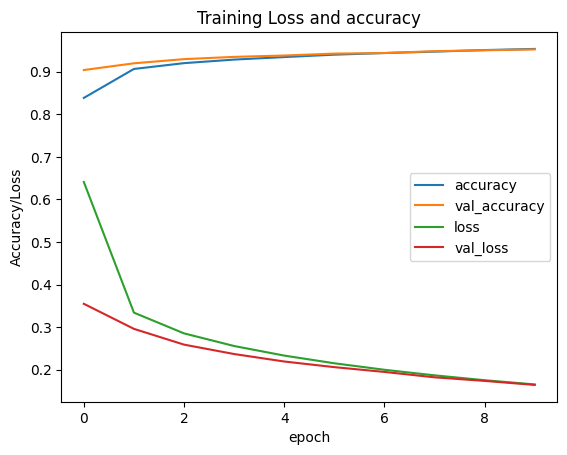

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show()

In [28]:
keras_model_path='C:\\Desktop'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Desktop\assets


INFO:tensorflow:Assets written to: C:\Desktop\assets


In [29]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)